<a href="https://colab.research.google.com/github/celiabarrosr/unav-coupon-recommendation-system/blob/main/notebooks/data-cleaning-and-prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import DataSet


### Importing Libraries

In [5]:
import kagglehub
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
import zipfile

# Read the Data

In [15]:
# Get Data
with zipfile.ZipFile('DB2A - Conductores.zip') as z:
    with z.open('in-vehicle-coupon-recommendation.csv') as f:
       data_raw = pd.read_csv(f, sep = ";")

In [16]:
# Rename of the columns names for easy use
data_raw.columns = data_raw.columns.\
    str.lower().\
    str.replace('/', '').\
    str.replace('(', '').\
    str.replace(')', '').\
    str.replace(' ', '_')

data_raw.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalstatus,...,coffeehouse,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq5min,tocoupon_geq15min,tocoupon_geq25min,direction_same,direction_opp,y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Understanding and examinate Data

## Fixing data types

In [17]:
data_raw.shape

(12684, 26)

In [18]:
df = data_raw.copy()

In [19]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalstatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  bar                   12577 non-null

In [20]:
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalstatus,...,coffeehouse,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq5min,tocoupon_geq15min,tocoupon_geq25min,direction_same,direction_opp,y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [21]:
df.iloc[0, :]

,0
destination,No Urgent Place
passanger,Alone
weather,Sunny
temperature,55
time,2PM
coupon,Restaurant(<20)
expiration,1d
gender,Female
age,21
maritalstatus,Unmarried partner


## Check the statistical values of features

In [22]:
df.numeric_features = pd.DataFrame()
df.categorical_features = df.iloc[:, :-1]

<ipython-input-22-e156f02a3da6>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numeric_features = pd.DataFrame()
<ipython-input-22-e156f02a3da6>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.categorical_features = df.iloc[:, :-1]


In [23]:
# Sanity Check for missing columns in the split
[col for col in df.columns if col not in df.numeric_features.columns and col not in df.categorical_features.columns]

['y']

In [24]:
# Plot histograms for numeric features using seaborn
if not df.numeric_features.empty:
    df.numeric_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    plt.show()

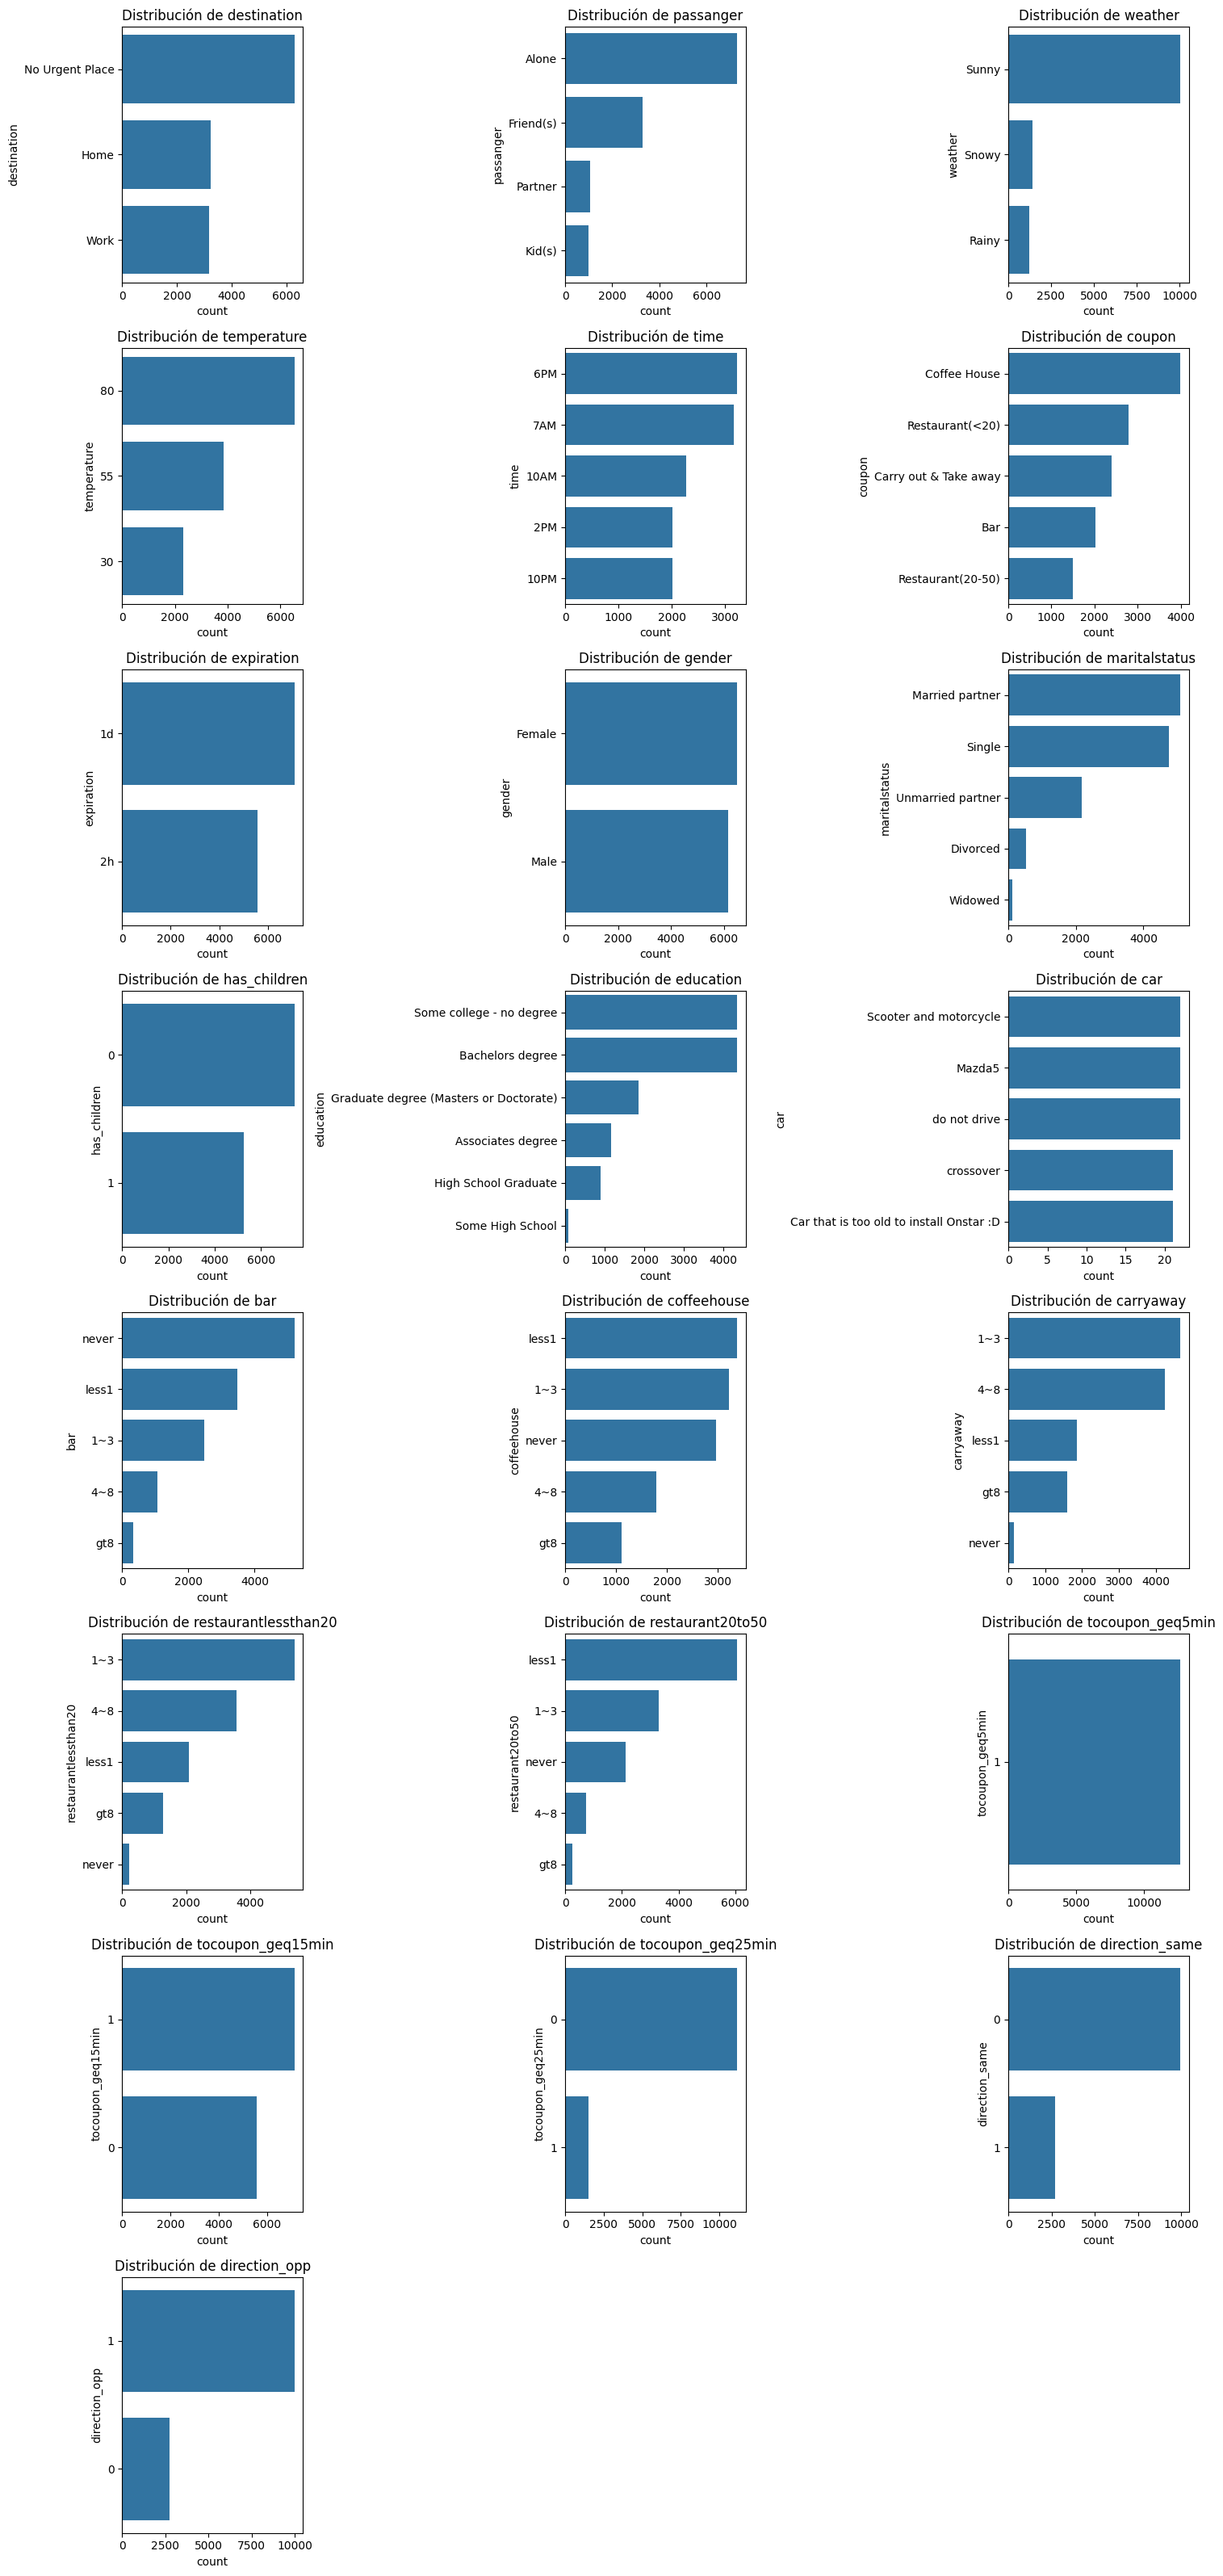

In [25]:
if not df.categorical_features.empty:
    categorical_limited = df.categorical_features.nunique()
    columns_to_plot = categorical_limited[categorical_limited <= 7].index

    # Number of plots required
    n_plots = len(columns_to_plot)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols  # dynamically set rows based on number of plots

    # Plot each categorical variable distribution
    plt.figure(figsize=(n_cols * 5, n_rows * 4))

    for i, col in enumerate(columns_to_plot, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(
            y=df.categorical_features[col],
            order=df.categorical_features[col].value_counts().index
        )
        plt.title(f'Distribución de {col}')

    plt.tight_layout()
    plt.show()


### Check class imbalance

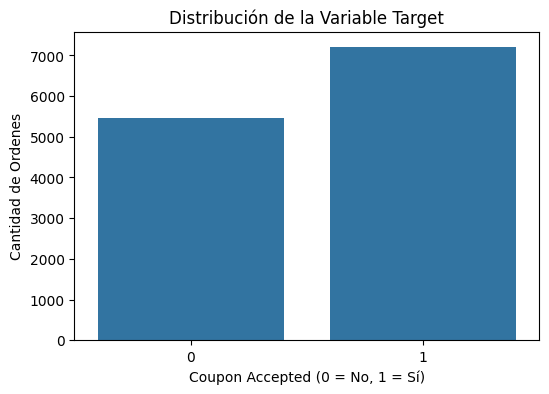

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['y'])
plt.title("Distribución de la Variable Target")
plt.xlabel("Coupon Accepted (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Ordenes")
plt.show()

## Identificación y Eliminación de Filas Duplicadas en un DataFrame

In [27]:
# Calcular las filas duplicadas
dups = df.duplicated()

# Reportar si existen filas duplicadas
print("¿Existen filas duplicadas?:", dups.any())
print("*" * 10)

# Listar todas las filas duplicadas
print("Filas duplicadas:")
print(df[dups])

df = df.drop_duplicates()
df.numeric_features = pd.DataFrame()
df.categorical_features = df.iloc[:, :-1]

¿Existen filas duplicadas?: True
**********
Filas duplicadas:
     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM     

<ipython-input-27-16e2a8122585>:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numeric_features = pd.DataFrame()
<ipython-input-27-16e2a8122585>:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.categorical_features = df.iloc[:, :-1]


## Check outliers

In [28]:
# Boxplots de las variables float64
if not df.numeric_features.empty:
    for column in df.numeric_features.columns:
        plt.figure(figsize=(17, 1))
        sns.boxplot(data=df, x=column)
        plt.show()

## Identifique las columnas que contienen un valor único

### Graficamos la cardinalidad de cada feature

Text(0.5, 1.0, 'Cardinality')

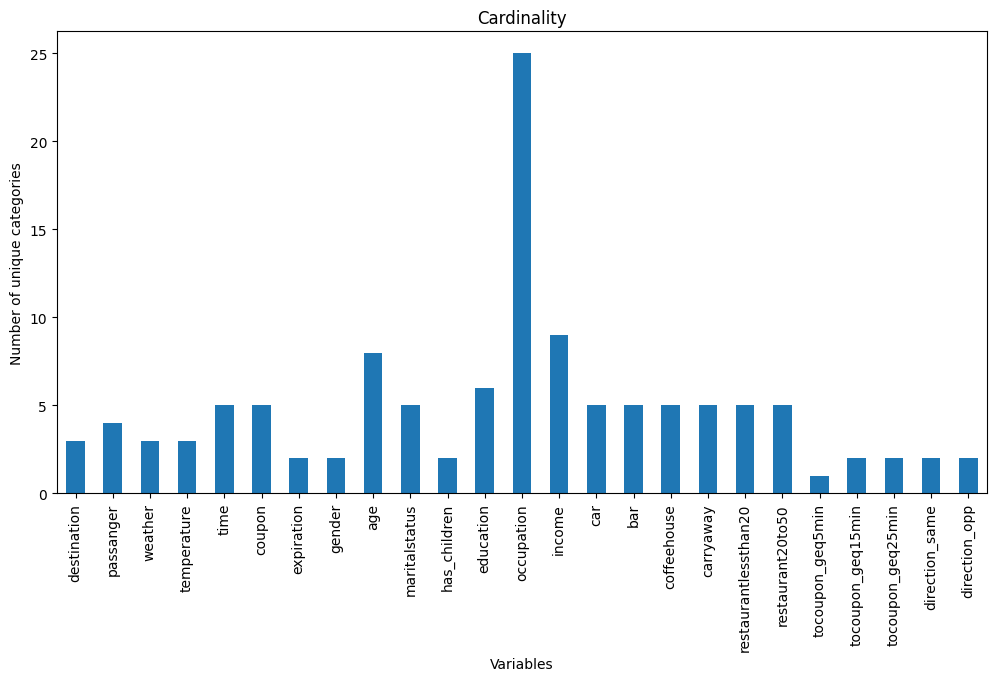

In [29]:
df.iloc[:, :-1].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [30]:
# Mostrar la forma del DataFrame y el número total de filas
print("Forma del DataFrame:", df.shape)
print("Número total de filas:", df.shape[0])

# Iterar sobre las columnas para calcular el porcentaje de valores únicos
for col in df.numeric_features.columns:
    # Calcular el número de valores únicos como porcentaje del total de filas
    percentage = (df[col].nunique() / df.shape[0]) * 100

    # Filtrar columnas con menos del 1% de valores únicos
    if percentage < 1:
        print('%s: %d valores únicos, %.2f%% del total' % (col, df[col].nunique(), percentage))


Forma del DataFrame: (12610, 26)
Número total de filas: 12610


In [31]:
# Importar la clase VarianceThreshold para eliminar columnas con baja varianza
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
from matplotlib import pyplot

# Convertir el DataFrame a una matriz numpy
data = df.copy().values

if not df.numeric_features.empty:
    # Mostrar la forma original del conjunto de datos
    print("Forma original de los datos (filas, columnas):", data.shape)

    # Dividir los datos en características (X) y variable objetivo (y)
    X = df.numeric_features.values  # Todas las columnas excepto la última
    y = data[:, -1]   # Última columna como variable objetivo
    print("Características (X):", X.shape, "Variable objetivo (y):", y.shape)

    # Definir el transformador VarianceThreshold con el umbral predeterminado (0)
    transform = VarianceThreshold()
    X_sel = transform.fit_transform(X)

    # Mostrar la forma después de eliminar columnas con varianza cero
    print("Forma después de eliminar varianza cero:", X_sel.shape)

    # Explorar múltiples umbrales de varianza
    thresholds = arange(0.0, 1.0, 0.05)
    results = []

    # Iterar sobre diferentes umbrales de varianza
    for t in thresholds:
        # Definir el transformador con el umbral actual
        transform = VarianceThreshold(threshold=t)
        # Transformar los datos
        X_sel = transform.fit_transform(X)
        # Contar el número de características retenidas
        n_features = X_sel.shape[1]
        print("")
        print('Umbral=%.2f, Características Retenidas=%d' % (t, n_features))
        # Almacenar el resultado
        results.append(n_features)

    # Visualizar la cantidad de características retenidas en función del umbral
    pyplot.plot(thresholds, results)
    pyplot.xlabel('Umbral de Varianza')
    pyplot.ylabel('Número de Características Retenidas')
    pyplot.title('Efecto del Umbral de Varianza en la Selección de Características')
    pyplot.show()


In [32]:
temp = df.copy()
temp.categorical_features = df.categorical_features.copy()
temp.numeric_features = df.numeric_features.copy()
temp.categorical_features

<ipython-input-32-372559d58725>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp.categorical_features = df.categorical_features.copy()
<ipython-input-32-372559d58725>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp.numeric_features = df.numeric_features.copy()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalstatus,...,bar,coffeehouse,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq5min,tocoupon_geq15min,tocoupon_geq25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,1,0,1


### Eliminar columnas debajo del umbral de casos unicos

In [33]:
# Drop columns with less than 1% unique values
delete_columns = ["gold_discount_share", "restaurant_penalty_rejection", "delivery"]
temp_numeric_features = list(df.numeric_features.columns)
temp_categorical_features = list(df.categorical_features.columns)

for col in delete_columns:
    if col in df.columns:
        print(f"Column {col} has been removed")
        df.drop(columns = col, inplace = True)
        if col in temp_numeric_features: temp_numeric_features.remove(col)
        if col in temp_categorical_features: temp_categorical_features.remove(col)
df.numeric_features = df[temp_numeric_features]
df.categorical_features = df[temp_categorical_features]

## Missing values

### Count missing values

### Mising Values

In [34]:
display(df.isnull().sum())

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalstatus,0


In [43]:

inputer_cancellation_reason = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not Cancelled'))
])

inputer_restaurant_compensation_cancellation = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

inputer_complaint_tag = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='No Complaint'))
])

inputer_rating = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

# KNNImputer pipeline (assuming numerical columns)
inputer_knn = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))
])

# ---- Combine Transformers ----
preprocessor_inputers = ColumnTransformer(
    transformers=[
        ('input_cancellation_reason', inputer_cancellation_reason, ['cancellation_rejection_reason']), # Changed column name here
        ('input_compensation_cancellation', inputer_restaurant_compensation_cancellation, ['restaurant_compensation_cancellation']),
        ('input_complaint_tag', inputer_complaint_tag, ['customer_complaint_tag']),
        ('input_rating', inputer_rating, ['rating']),
        ('input_knn_imputer', inputer_knn, ['rider_wait_time_minutes','kpt_duration_minutes'])  # Replace with your numerical columns
    ])

# Apply the transformation
X_processed = preprocessor_inputers.fit_transform(df)

# Get feature names
columns = ["__".join(col.split("__")[1:]) for col in ColumnTransformer.get_feature_names_out(preprocessor_inputers)]

# Assign transformed values back to the DataFrame
df[columns] = X_processed

ValueError: A given column is not a column of the dataframe

### Mising Values After

In [36]:
display(df.isnull().sum())

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalstatus,0
